### OPENCV

##### 1.Images representaion(reading and writing)

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#### 1.1 RGB


In [4]:
input=cv2.imread("./images/input.jpg")
cv2.imshow("football is my love",input)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print(input.shape)
print("B G R values for an pixel are "+str(input[520,500]))
cv2.imwrite('output.jpg', input)

(1200, 1800, 3)
B G R values for an pixel are [37 94 85]


True

In [6]:
B,G,R=cv2.split(input)
cv2.imshow("blue component" ,B)
cv2.imshow("Red component" ,R)
cv2.imshow("Green component" ,G)
cv2.waitKey(0)
cv2.destroyAllWindows()
# remake the original image
mraged_img=cv2.merge([B,G,R+50])
cv2.imshow("merged image with amplifying red",mraged_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 1.2 Grayscaling(black and whte Images)

In [7]:
gray_images=cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)
cv2.imshow("football in grey",gray_images)
print("in black and white we have one value for an pixel are "+str(gray_images[520,500]))
cv2.waitKey(0)
cv2.destroyAllWindows()

in black and white we have one value for an pixel are 85


#### 1.3 anoher useful color space is HSV
hsv is usefyl in color filtering

In [8]:
hsv_image=cv2.cvtColor(input,cv2.COLOR_BGR2HSV)
cv2.imshow("football in hsv",hsv_image)
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1.4 Histograms

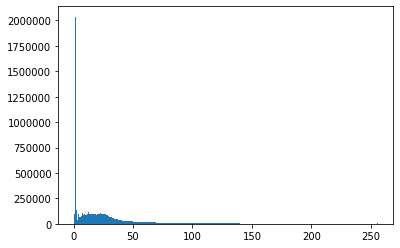

In [9]:
"""
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

images: it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
channels: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
mask: mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
histSize: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256].
"""

histo=cv2.calcHist([input],[0],None,[256],[0,256])
# ravel flattens our input array(from 2D to 1D)
plt.hist(input.ravel(),256,[0,256])
plt.show()

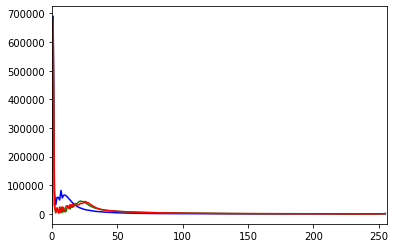

In [10]:
for i,c in enumerate(['b','g','r']):
    histo2=cv2.calcHist([input],[i],None,[256],[0,256])
    plt.plot(histo2, color = c)
    plt.xlim([0,256])
plt.show()



#### 1.5 drawing images and shapes

In [16]:
import cv2
import numpy as np

# Create a black image
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white?
image_bw = np.zeros((512,512), np.uint8)

# darwing a line
cv2.line(image, (0,0), (511,511), (255,127,0), 5)
# draw a rectangle
cv2.rectangle(image, (100,100), (300,250), (127,50,127), -1)
# draw a circle
cv2.circle(image, (350, 350), 100, (15,75,50), -1)
# draw a shape
# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [100,500]], np.int32)
# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

# put a text
cv2.putText(image, 'Hello Folks!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
cv2.imshow("Image shapes", image)

cv2.waitKey(0)
cv2.destroyAllWindows()